# Comparisons In A Given Loss Landscape

In [1]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

from minima_volume.analysis_funcs import (  grab_folder_names,
                                            load_base_train_size,
                                            list_additional_data,
                                            multiple_minima_fixed_landscape,
                                            fixed_landscape_minima_labels,
                                            plot_fixed_landscape_minima_pair,
                                            plot_perturb_probs,
                                            model_volume_across_targets,
                                            append_cutoff_points,
                                            varying_landscape_minima_labels,
                                            plot_minima_volume_vs_data_level,
                                            multiple_minima_fixed_landscape_perturb_probs,
                    
)

loss_value = 0.1  # Loss value to analyze
data_level_log = False #Is the data log distributed?
base_output_dir = "analysis"  # Root folder to save all plots
os.makedirs(base_output_dir, exist_ok=True)

# Data for the loss landscape levels
experiment_folders, data_modifications = grab_folder_names()

base_train_size = load_base_train_size(experiment_folders[0])
model_data_sizes = list_additional_data(experiment_folders[0])

base_shift = 0
if data_modifications[0].startswith("data_"):
    base_shift = base_train_size  # Shift to reflect true dataset size

print("Experiment folders: ", experiment_folders)
print("Different data levels where loss landscapes were computed:", data_modifications)
print("The base train size is: ", base_train_size)
print("Data levels where models were trained: ", model_data_sizes)

First entry: Model_0, base_train_size = 20
Experiment folders:  ['model_0_data_10', 'model_1_data_11', 'model_2_data_12', 'model_3_data_13', 'model_4_data_14', 'model_5_data_15', 'model_6_data_16', 'model_7_data_17', 'model_8_data_18', 'model_9_data_19']
Different data levels where loss landscapes were computed: ['data_0', 'data_180', 'data_30', 'data_380', 'data_780', 'data_80']
The base train size is:  20
Data levels where models were trained:  [0, 180, 30, 380, 780, 80]


## Plotting Different Model Volumes In A Landscape


Processing data modification folder: data_0
all_mdl: type=<class 'numpy.ndarray'>, shape=(10, 6)
all_log_rn: type=<class 'numpy.ndarray'>, shape=(10, 6)
all_test_loss: type=<class 'numpy.ndarray'>, shape=(10, 6)


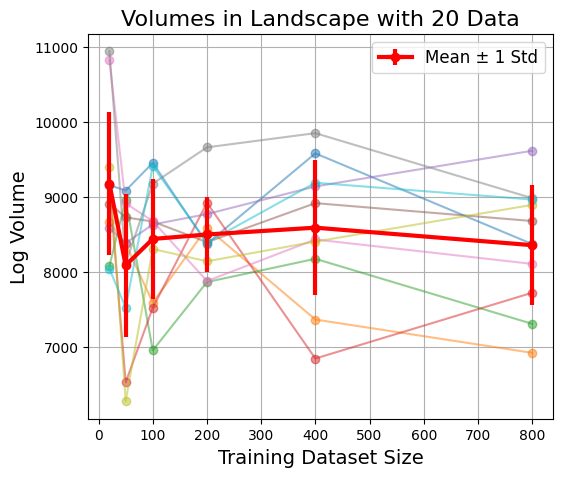

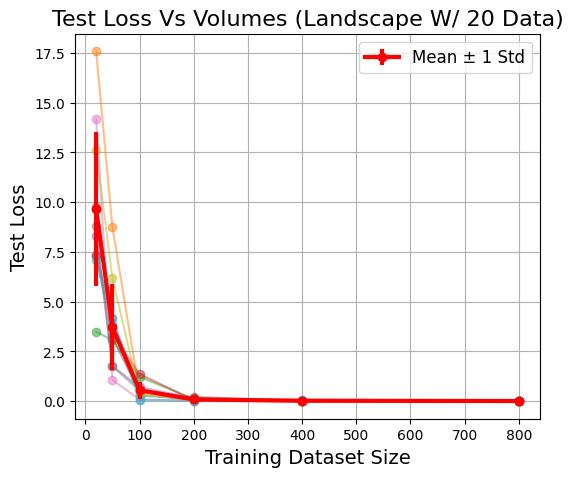

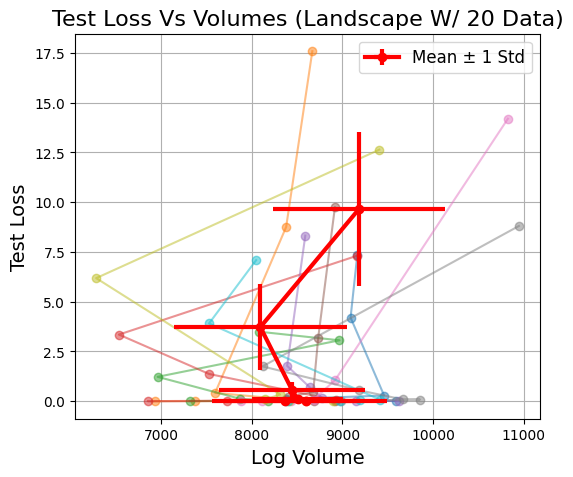

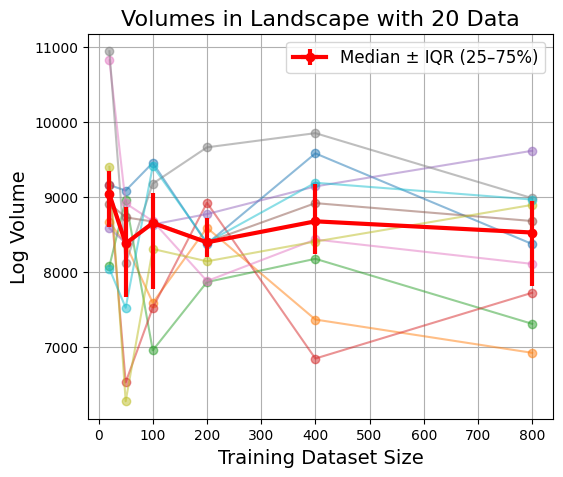

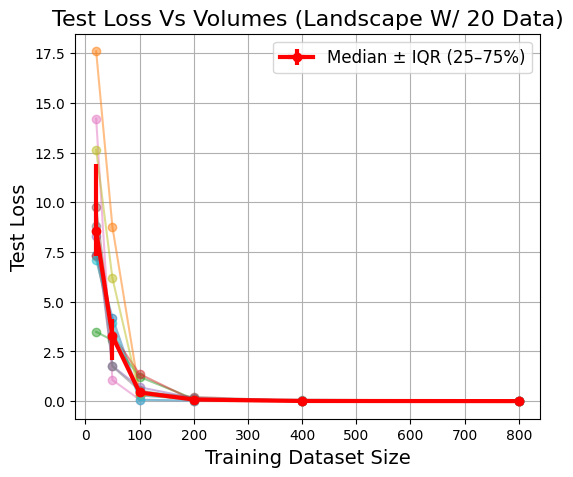

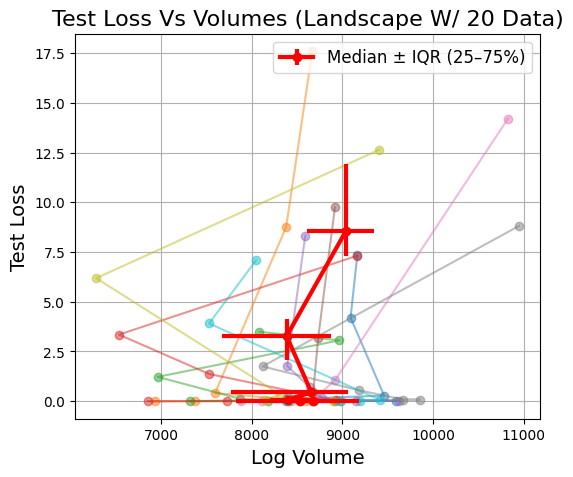


Processing data modification folder: data_180
all_mdl: type=<class 'numpy.ndarray'>, shape=(10, 3)
all_log_rn: type=<class 'numpy.ndarray'>, shape=(10, 3)
all_test_loss: type=<class 'numpy.ndarray'>, shape=(10, 3)


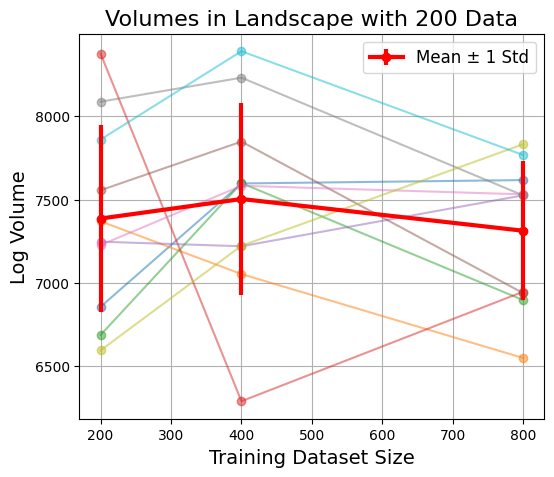

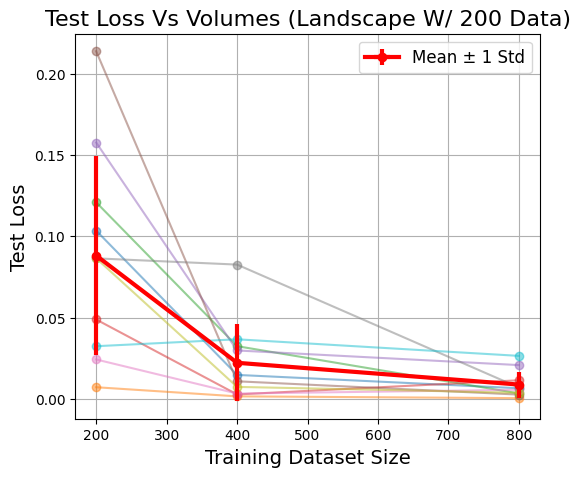

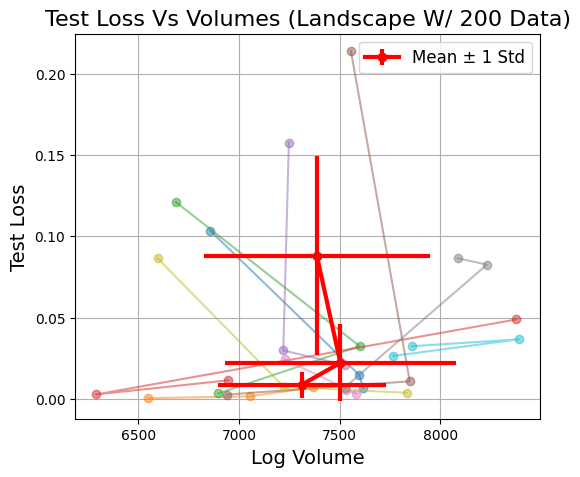

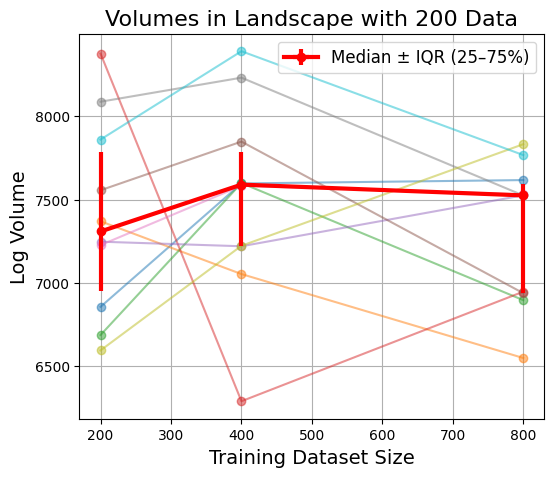

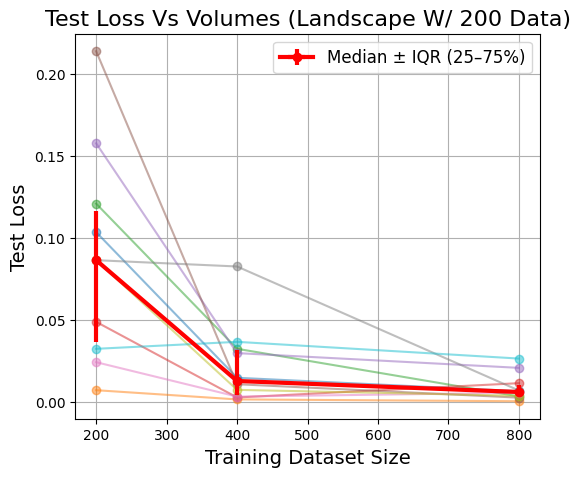

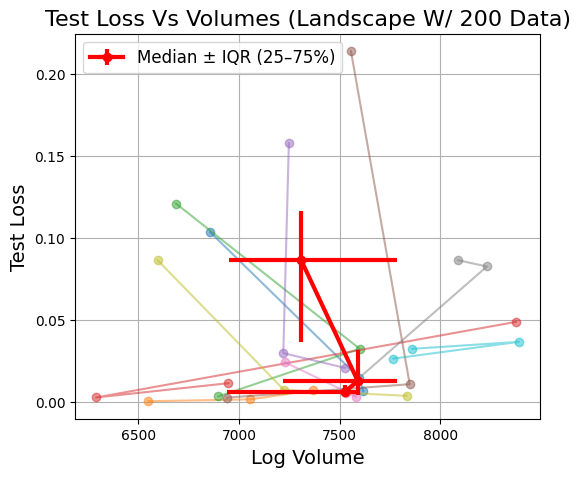


Processing data modification folder: data_30
all_mdl: type=<class 'numpy.ndarray'>, shape=(10, 5)
all_log_rn: type=<class 'numpy.ndarray'>, shape=(10, 5)
all_test_loss: type=<class 'numpy.ndarray'>, shape=(10, 5)


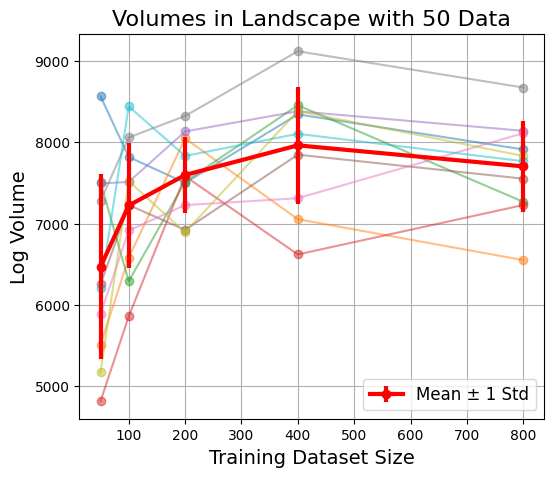

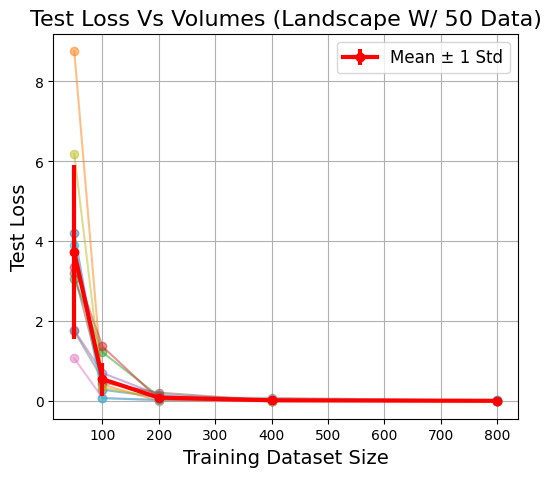

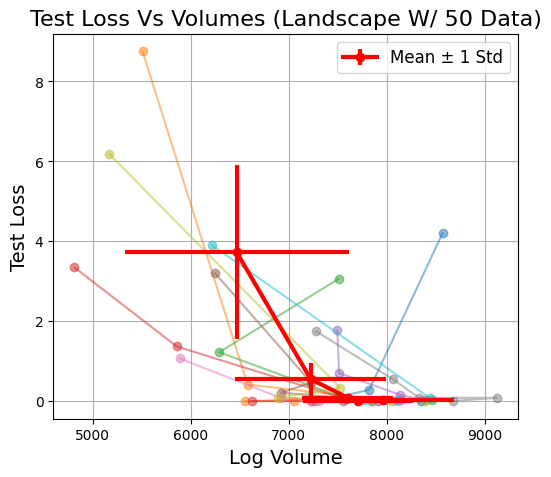

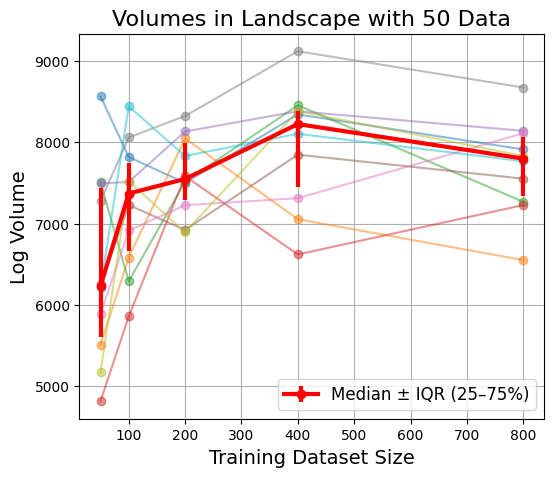

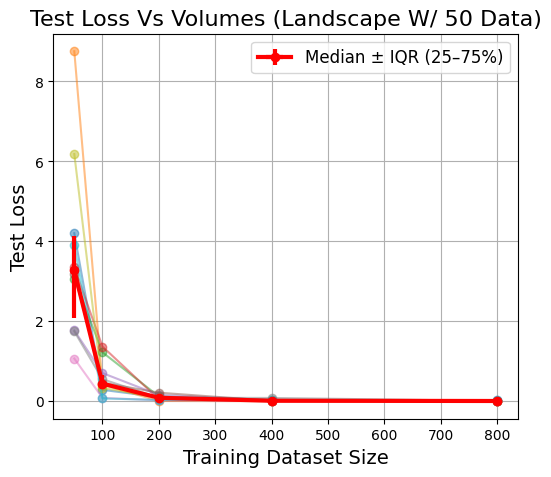

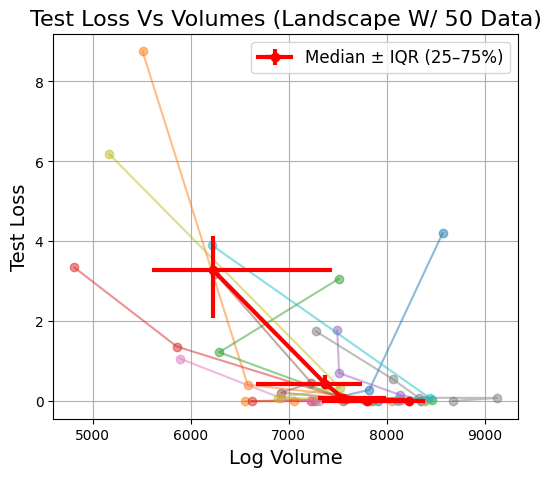


Processing data modification folder: data_380
all_mdl: type=<class 'numpy.ndarray'>, shape=(10, 2)
all_log_rn: type=<class 'numpy.ndarray'>, shape=(10, 2)
all_test_loss: type=<class 'numpy.ndarray'>, shape=(10, 2)


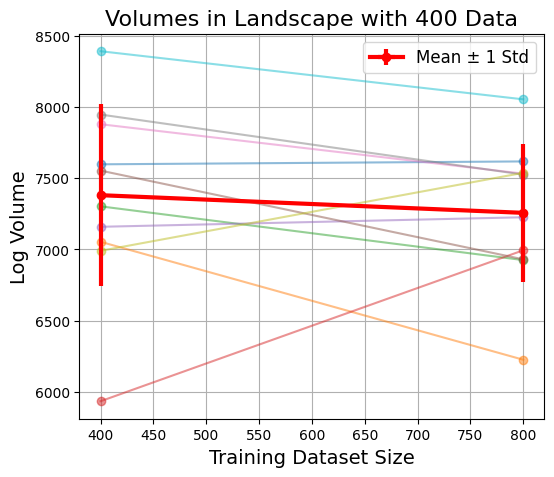

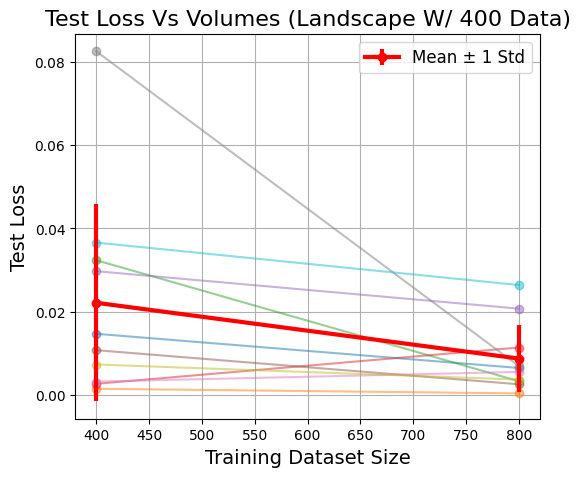

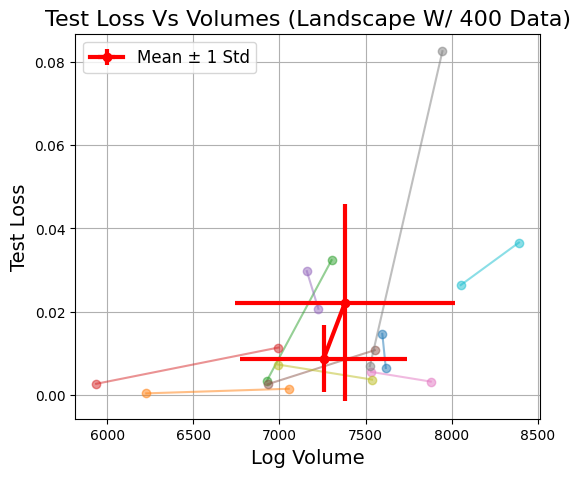

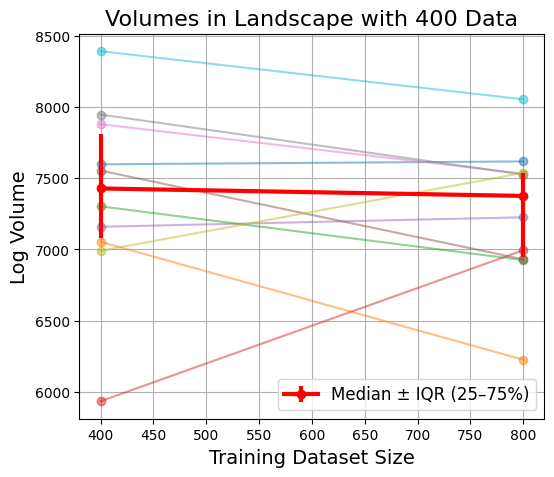

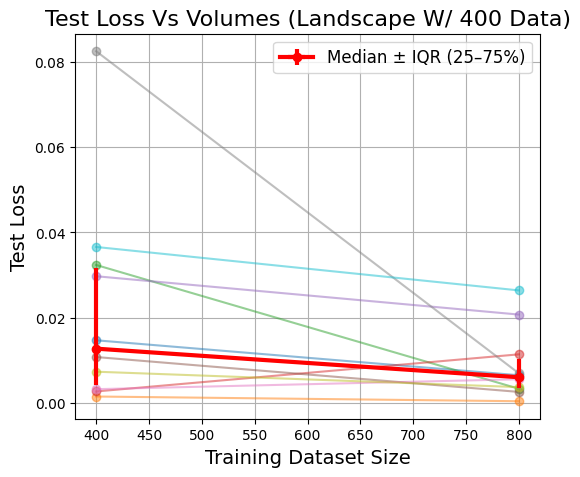

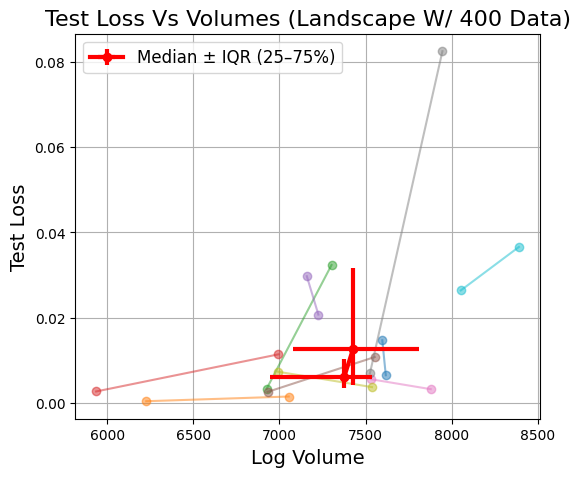


Processing data modification folder: data_780
all_mdl: type=<class 'numpy.ndarray'>, shape=(10, 1)
all_log_rn: type=<class 'numpy.ndarray'>, shape=(10, 1)
all_test_loss: type=<class 'numpy.ndarray'>, shape=(10, 1)


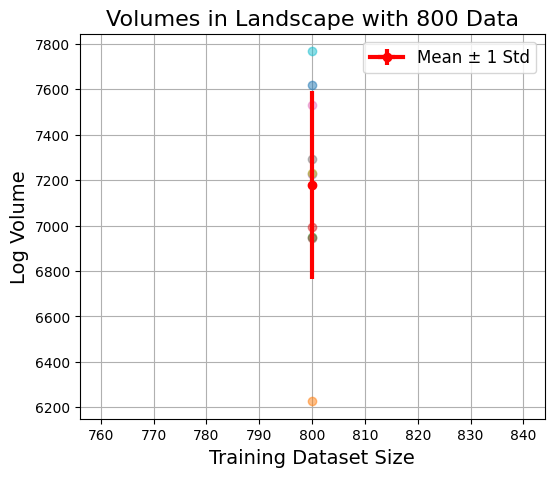

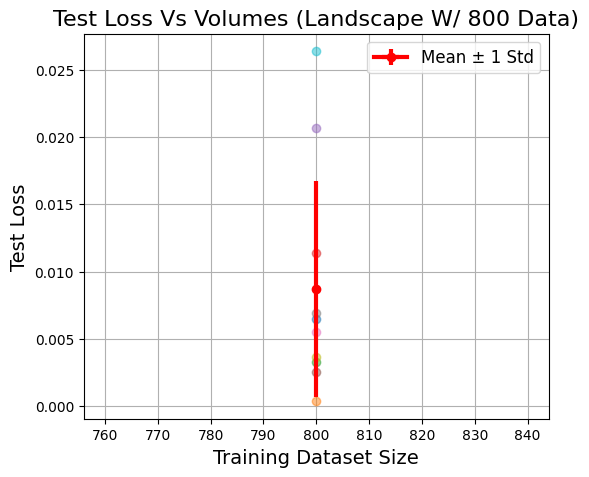

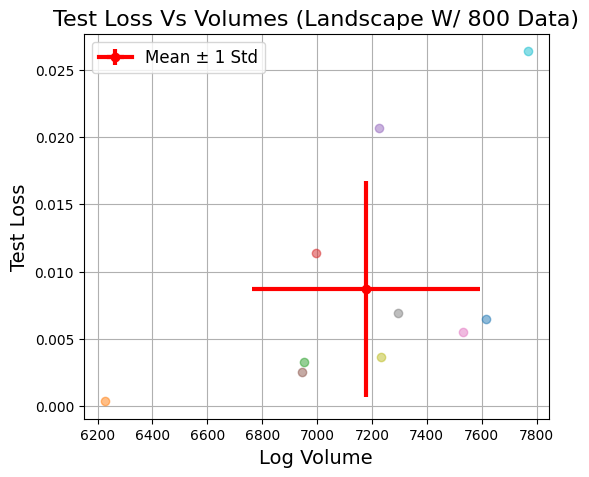

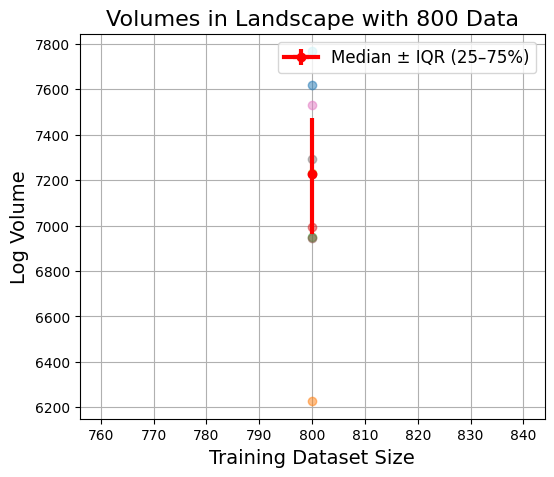

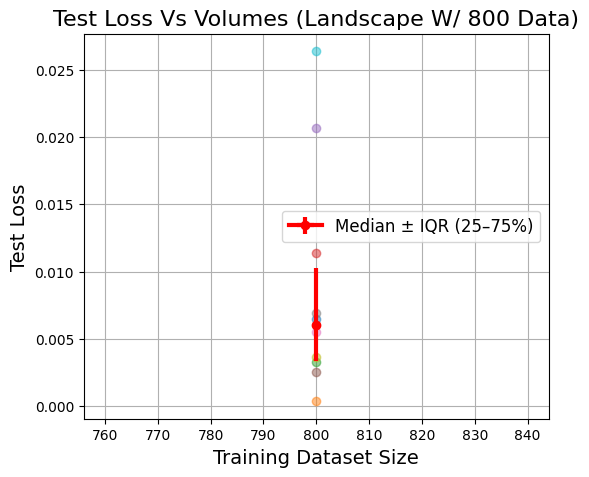

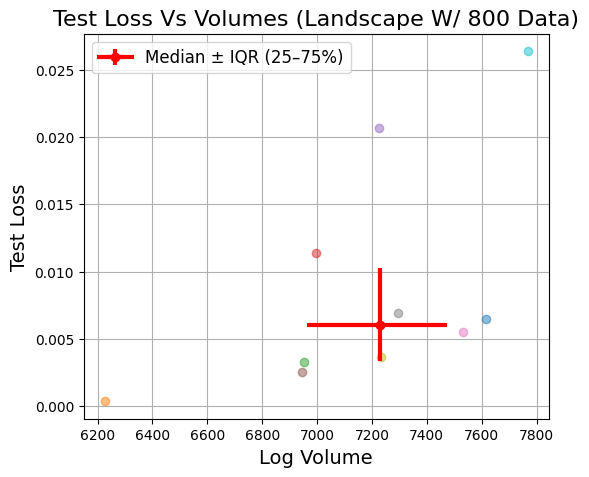


Processing data modification folder: data_80
all_mdl: type=<class 'numpy.ndarray'>, shape=(10, 4)
all_log_rn: type=<class 'numpy.ndarray'>, shape=(10, 4)
all_test_loss: type=<class 'numpy.ndarray'>, shape=(10, 4)


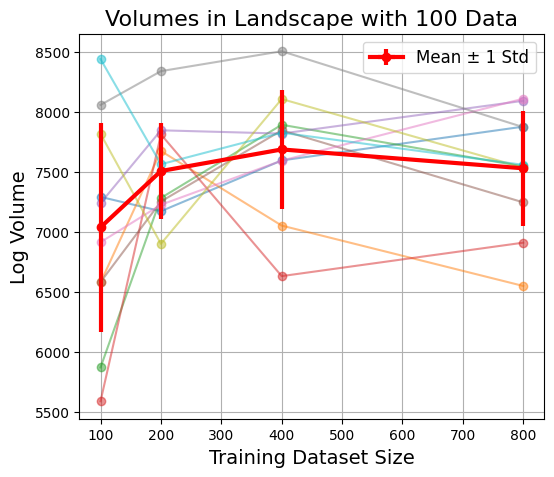

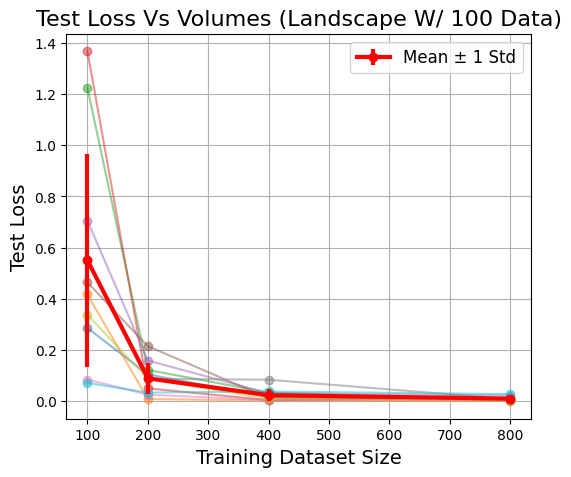

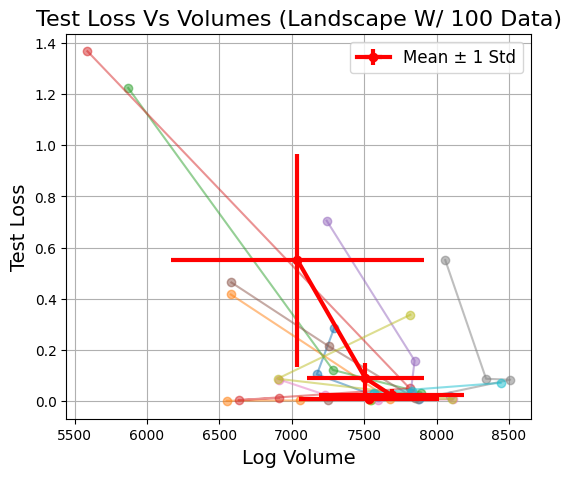

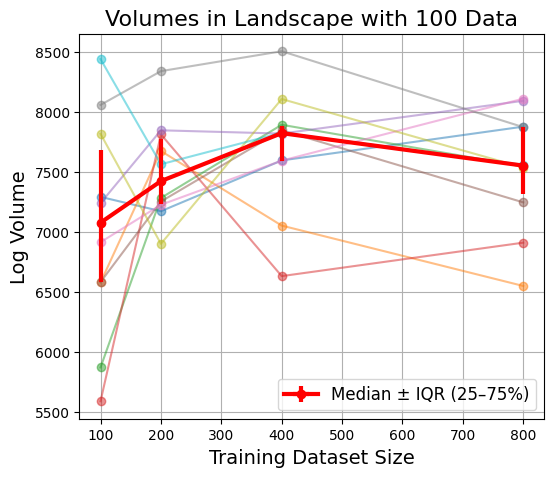

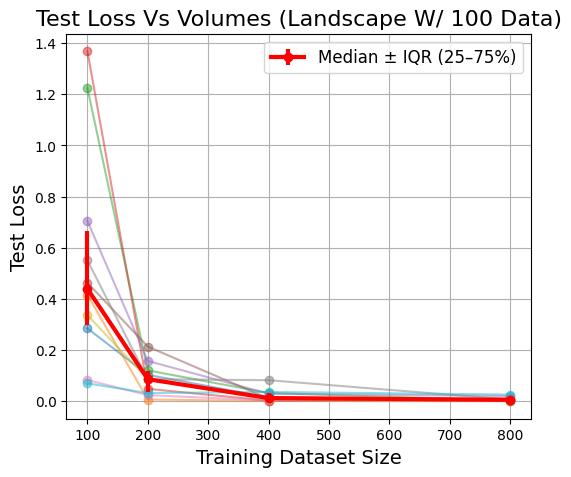

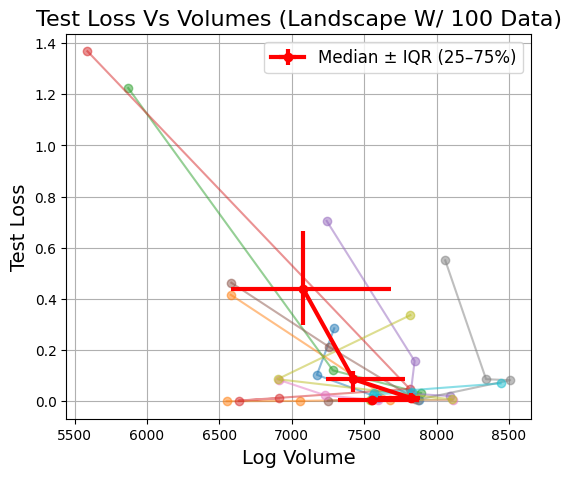

In [2]:
for data_modification in data_modifications:
    print(f"\nProcessing data modification folder: {data_modification}")

    # Create output folder for this data_modification
    save_dir = os.path.join(base_output_dir, data_modification)
    os.makedirs(save_dir, exist_ok=True)

    # Get axis labels and titles
    labels = fixed_landscape_minima_labels(data_modification, base_train_size)

    # Extract minima landscapes
    all_mdl, all_log_rn, all_test_loss = multiple_minima_fixed_landscape(
        experiment_folders, data_modification, loss_value #mdl is modification data level
    )
    number_of_minima = len(all_mdl[0]) # Not used currently

    all_mdl = np.array(all_mdl)
    all_log_rn = np.array(all_log_rn)
    all_test_loss = np.array(all_test_loss)
    
    # Print types and shapes
    for name, var in [("all_mdl", all_mdl), ("all_log_rn", all_log_rn), ("all_test_loss", all_test_loss)]:
        print(f"{name}: type={type(var)}, shape={var.shape}")
    
    # Central tendency runs: mean and median
    for ct, suffix in [("mean", "_avg"), ("median", "_median")]:
        for ranking in [False, True]:
            out_dir = save_dir if not ranking else os.path.join(save_dir, "ranks") #handles ranking
            os.makedirs(out_dir, exist_ok=True)

            # --- Data-level plots: loop through shaded + errorbar ---
            #for avg_style in ["shaded", "errorbar"]:
            #    style_suffix = "_shaded" if avg_style == "shaded" else "_errbar"
            style_suffix = "_errbar"
            avg_style = "errorbar"

            # --- Data level vs Log Volume ---
            plot_fixed_landscape_minima_pair(
                all_mdl, all_log_rn,
                xlabel=labels["xlabel"], ylabel="Log Volume",
                title=labels["title_volume"],
                log_scale=data_level_log,
                ranking=ranking,
                alpha=0.5,
                output_dir=out_dir,
                filename="data_level_vs_log_volume" + suffix + style_suffix,
                show_plot=not ranking,
                plot_average=True,
                average_style=avg_style,
                central_tendency=ct,
                plot_x_error=(avg_style == "errorbar"),
                xlabel_size=14, ylabel_size=14, title_size=16,
                base_shift=base_shift,
            )

            # --- Data level vs Test Loss ---
            plot_fixed_landscape_minima_pair(
                all_mdl, all_test_loss,
                xlabel=labels["xlabel"], ylabel="Test Loss",
                title=labels["title_loss"],
                log_scale=False,
                ranking=ranking,
                alpha=0.5,
                output_dir=out_dir,
                filename="data_level_vs_test_loss" + suffix + style_suffix,
                show_plot=not ranking,
                plot_average=True,
                average_style=avg_style,
                central_tendency=ct,
                plot_x_error=(avg_style == "errorbar"),
                xlabel_size=14, ylabel_size=14, title_size=16,
                base_shift=base_shift,
            )

            # --- Log Volume vs Test Loss ---
            # Only error bar version (no shaded version)
            plot_fixed_landscape_minima_pair(
                all_log_rn, all_test_loss,
                xlabel="Log Volume", ylabel="Test Loss",
                title=labels["title_loss"],
                log_scale=False,
                ranking=ranking,
                alpha=0.5,
                output_dir=out_dir,
                filename="log_volume_vs_test_loss" + suffix + "_errbar",
                show_plot=not ranking,
                plot_average=True,
                average_style="errorbar",
                central_tendency=ct,
                plot_x_error=True,  # allow x-error bars
                xlabel_size=14, ylabel_size=14, title_size=16
            )

# Aggregrate Test Accuracy

Test accuracy vs dataset size across all plots.

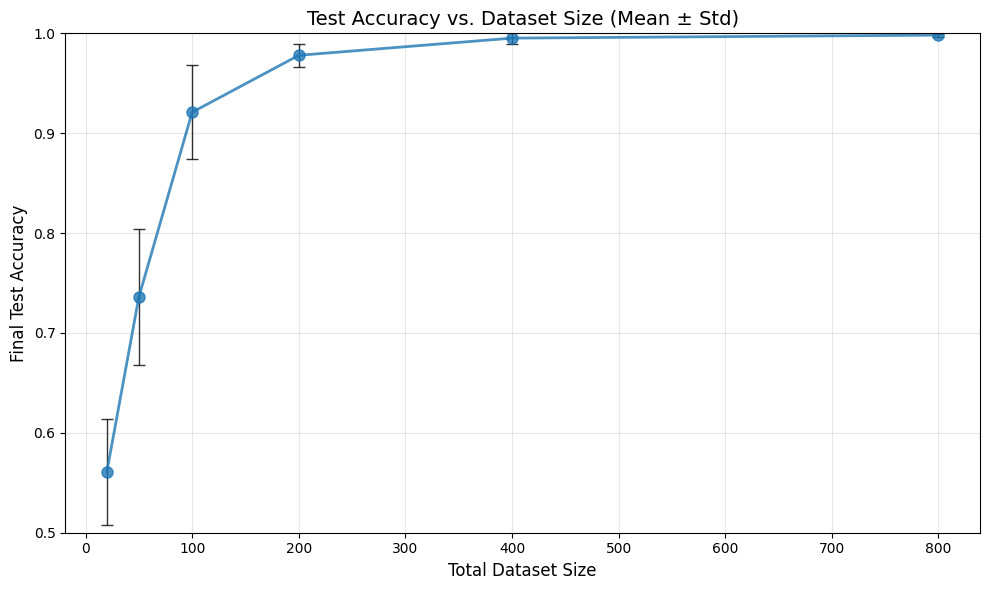

✅ Plot saved to analysis\test_acc_plot.png
✅ Aggregated data saved to analysis\test_acc.npz


In [3]:
missing_folders = [folder for folder in experiment_folders
                   if not os.path.exists(os.path.join(folder, "test_accuracies.npz"))]

if missing_folders:
    print(f"⚠️ Skipping aggregation — missing test_accuracies.npz in: {missing_folders}")
else:
    # ---------- Step 2: Load all data ----------
    all_dataset_sizes = []
    all_accuracies = []

    for folder in experiment_folders:
        file_path = os.path.join(folder, "test_accuracies.npz")
        data = np.load(file_path)
        all_dataset_sizes.extend(data["dataset_sizes"])
        all_accuracies.extend(data["final_test_accuracies"])

    all_dataset_sizes = np.array(all_dataset_sizes)
    all_accuracies = np.array(all_accuracies)

    # ---------- Step 3: Group by dataset size ----------
    grouped_data = defaultdict(list)
    for size, acc in zip(all_dataset_sizes, all_accuracies):
        grouped_data[size].append(acc)

    sorted_sizes = np.array(sorted(grouped_data.keys()))
    mean_accs = np.array([np.mean(grouped_data[size]) for size in sorted_sizes])
    std_accs = np.array([np.std(grouped_data[size]) for size in sorted_sizes])

    # ---------- Step 4: Plot with error bars ----------
    plt.figure(figsize=(10, 6))
    plt.errorbar(
        sorted_sizes, mean_accs, yerr=std_accs,
        fmt='o-', capsize=4, linewidth=2, markersize=8,
        color='tab:blue', ecolor='black', elinewidth=1, alpha=0.8
    )

    plt.xlabel("Total Dataset Size", fontsize=12)
    plt.ylabel("Final Test Accuracy", fontsize=12)
    plt.title("Test Accuracy vs. Dataset Size (Mean ± Std)", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.ylim((0.5, 1.0))
    plt.tight_layout()

    os.makedirs(base_output_dir, exist_ok=True)
    plot_path = os.path.join(base_output_dir, "test_acc_plot.png")
    plt.savefig(plot_path, bbox_inches="tight")
    plt.show()
    plt.close()

    print(f"✅ Plot saved to {plot_path}")

    # ---------- Step 5: Save combined data ----------
    save_path = os.path.join(base_output_dir, "test_acc.npz")
    np.savez(
        save_path,
        dataset_sizes=sorted_sizes,
        mean_accuracies=mean_accs,
        std_accuracies=std_accs,
        all_dataset_sizes=all_dataset_sizes,
        all_accuracies=all_accuracies
    )
    print(f"✅ Aggregated data saved to {save_path}")

# Comparisons Across Loss Landscapes



Here, we track the performance of all models across all loss landscapes.

Collected results for 10 experiments
Collected results for 10 experiments
Collected results for 10 experiments
Collected results for 10 experiments
Collected results for 10 experiments
Collected results for 10 experiments
Model_0: first exceedance at index 22 (value=0.8210535645484924, threshold=0.1)
Appended cutoff for model_0_data_10 | target=0, cutoff_idx=22
Model_0: first exceedance at index 20 (value=0.5731071829795837, threshold=0.1)
Appended cutoff for model_1_data_11 | target=0, cutoff_idx=20
Model_0: first exceedance at index 22 (value=0.28117480874061584, threshold=0.1)
Appended cutoff for model_2_data_12 | target=0, cutoff_idx=22
Model_0: first exceedance at index 22 (value=0.48719584941864014, threshold=0.1)
Appended cutoff for model_3_data_13 | target=0, cutoff_idx=22
Model_0: first exceedance at index 25 (value=0.14498716592788696, threshold=0.1)
Appended cutoff for model_4_data_14 | target=0, cutoff_idx=25
Model_0: first exceedance at index 20 (value=1.6543551683425903, 

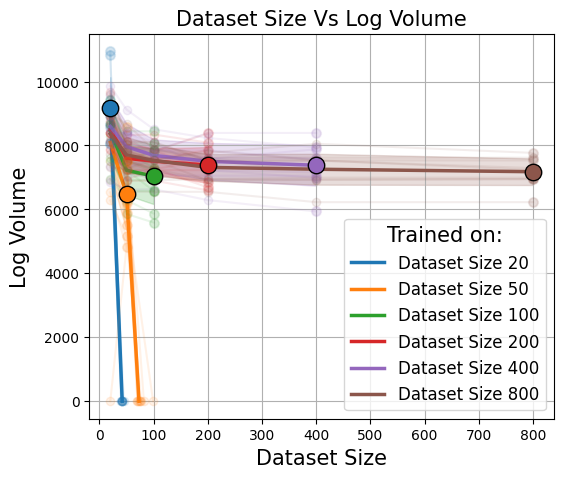

In [4]:
# For the poisoning experiments, this plot has no meaning

labels = varying_landscape_minima_labels(
    data_modification_folder=data_modifications[0], # Random choice to grab datatype from
    base_train_size=base_train_size,
)

results_dict = model_volume_across_targets(
    target_model_data_levels=model_data_sizes,
    loss_value=loss_value,
    experiment_folders=experiment_folders
)
results_with_cutoff = append_cutoff_points(results_dict, threshold=loss_value, base_dir=".")

found_minima_vol, found_minima_dataset = plot_minima_volume_vs_data_level(
    results_dict = results_with_cutoff,
    data_type=labels["data_type"],          # NEW: needed for correct legend labels
    base_train_size=base_train_size,  # NEW: used for dataset size shifts
    xlabel=labels["xlabel"],
    ylabel="Log Volume",
    title=labels["title_volume"],
    log_scale = data_level_log,
    alpha=0.1,
    plot_average=True,
    output_dir=base_output_dir, filename="log_volumes_vs_data_levels",
    xlabel_size=15, ylabel_size=15, title_size=15
)

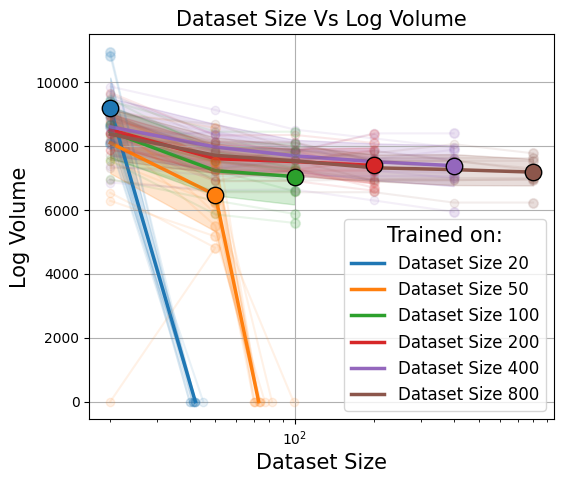

In [5]:
_, _ = plot_minima_volume_vs_data_level(
    results_dict = results_with_cutoff,
    data_type=labels["data_type"],          # NEW: needed for correct legend labels
    base_train_size=base_train_size,  # NEW: used for dataset size shifts
    xlabel=labels["xlabel"],
    ylabel="Log Volume",
    title=labels["title_volume"],
    log_scale = True,
    alpha=0.1,
    plot_average=True,
    output_dir=base_output_dir, filename="log_volumes_vs_data_levels_log",
    xlabel_size=15, ylabel_size=15, title_size=15
)

## Power Law Exponent For Volume Scaling

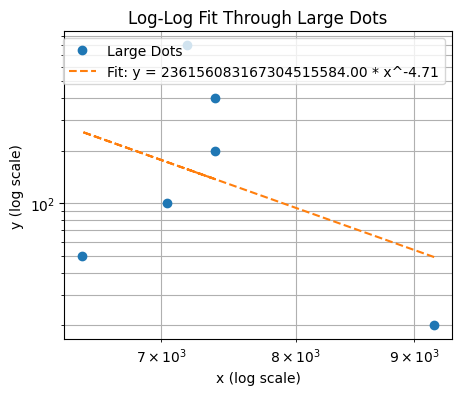

In [6]:
# Convert to numpy arrays
xs = np.array(found_minima_dataset)
ys = np.array(found_minima_vol)

# Fit straight line in log-log space: log(y) = a*log(x) + b
log_xs, log_ys = np.log(xs), np.log(ys)
a, b = np.polyfit(log_xs, log_ys, deg=1)
fit_line = np.exp(b) * xs**a

# Plot
plt.figure(figsize=(5, 4))
plt.loglog(xs, ys, 'o', label="Large Dots")
plt.loglog(xs, fit_line, '--', label=f"Fit: y = {np.exp(b):.2f} * x^{a:.2f}")
plt.xlabel("x (log scale)")
plt.ylabel("y (log scale)")
plt.title("Log-Log Fit Through Large Dots")
plt.legend()
plt.grid(True, which="both")
plt.show()